## Import librairies

**Ecole nationale de la Statistique et de l'Analyse Economique (ENSAE-DAKAR)**

---


# **TP Machine learning 2 : Clustering des images de chiffres**


---



## Réalisé par Hania HACHIM, Elève Ingénieure Statisticienne Economiste
## Sous la supervision de Mme Mously DIAW, Data scientist


Mai 2025

In [1]:
%matplotlib inline

from time import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification, load_digits
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from yellowbrick.cluster import InterclusterDistance, SilhouetteVisualizer, KElbowVisualizer


pd.set_option("display.max_columns", None)

## Load the dataset

We will start by loading the digits dataset. This dataset contains handwritten digits from 0 to 9. In the context of clustering, one would like to group images such that the handwritten digits on the image are the same.

In [2]:
load_digits?
# Permet de voir la structure du dataset


In [3]:
digits = load_digits()  # Dimensionality: 64 features

X, labels = digits.data, digits.target
images = digits.images

# column name for 64
column_names = [f"X{i}" for i in range(64)]

data = pd.DataFrame(X, columns=column_names).assign(label=labels)

(n_samples, n_features), n_digits = X.shape, np.unique(labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

# digits: 10; # samples: 1797; # features 64


In [4]:
data.head()
# chaque x represente une partie de l'image ; l'ordre est important : le premier pixel est toujours le X0; le dernier est le X63

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


## EDA

<ipython-input-5-5a6f7f88c0c3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='tab10')


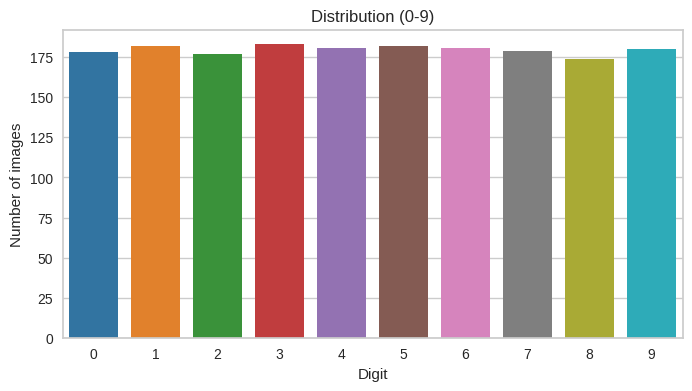

In [5]:
plt.figure(figsize=(8, 4))
sns.countplot(x='label', data=data, palette='tab10')

plt.title("Distribution (0-9)")
plt.xlabel("Digit")
plt.ylabel("Number of images")
plt.show()

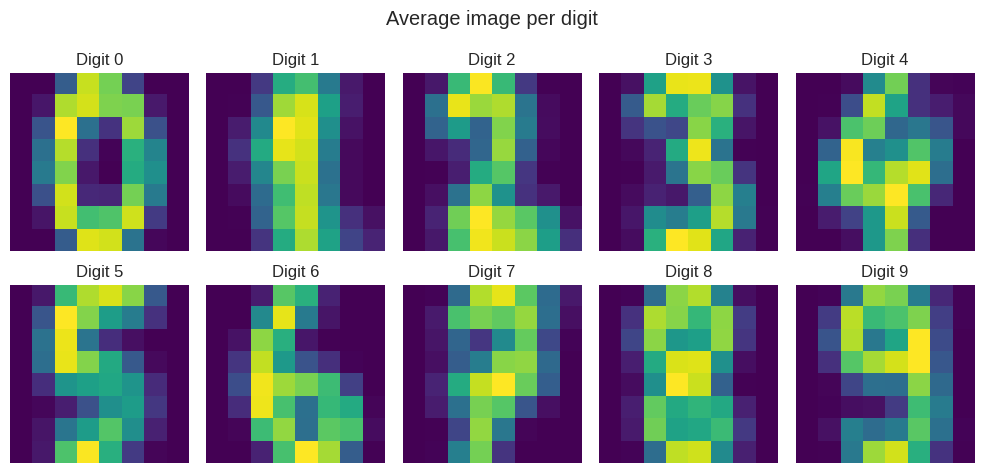

In [6]:
# mean by digit
mean_images = np.zeros((10, 64))  # 64 pixels
for i in range(10):
    mean_images[i] = data.loc[data.label == i, column_names].mean(axis=0)


fig, axs = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axs.flat):
    ax.imshow(mean_images[i].reshape(8, 8), cmap='viridis')
    ax.set_title(f"Digit {i}")
    ax.axis('off')
plt.suptitle("Average image per digit")
plt.tight_layout()
plt.show()

La valeur du pixel est proportionnelle au constraste du pixel

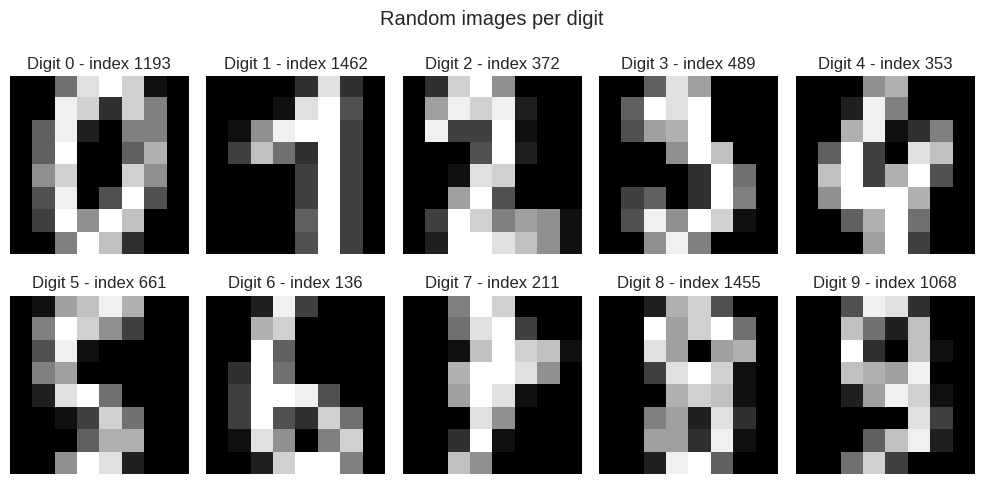

In [7]:
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
plt.subplots_adjust(left=0.01, right=0.99, bottom=0.01, top=0.91, hspace=0.5)

for i, label in enumerate(np.unique(labels)):
    ax = axs[i // 5, i % 5]
    # Random choice by digit
    idx = np.random.choice(np.where(labels == label)[0])
    ax.imshow(images[idx], cmap='gray')
    ax.set_title(f"Digit {label} - index {idx}")
    ax.axis('off')

plt.suptitle("Random images per digit")
plt.tight_layout()
plt.show();

## Define our evaluation benchmark

We will first our evaluation benchmark. During this benchmark, we intend to compare different initialization methods for KMeans. Our benchmark will:

create a pipeline which will scale the data using a StandardScaler;

train and time the pipeline fitting;

measure the performance of the clustering obtained via different metrics.
Tester l'algorithme Kmeans; on peut utiliser la librairie OpenCv pour le resizing des images


In [8]:
def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(MinMaxScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]


    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

### Run benchmark

In [9]:
print(82 * "_")
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tsilhouette")

kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=X, labels=labels)

kmeans = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=X, labels=labels)

pca = PCA(n_components=0.99).fit(X)
kmeans = KMeans(init="k-means++",
                n_clusters=n_digits, n_init=4,random_state=0)
bench_k_means(kmeans=kmeans, name="PCA-based",
              data=pca.transform(X), labels=labels)

print(82 * "_")
print(f"PCA n components: {pca.n_components_}")

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	silhouette
k-means++	0.354s	4647	0.739	0.747	0.743	0.669	0.174
random   	0.120s	4648	0.735	0.742	0.738	0.667	0.188
PCA-based	0.179s	1294	0.765	0.770	0.767	0.699	0.170
__________________________________________________________________________________
PCA n components: 41


In [10]:
pca.components_.shape

(41, 64)

 On fait de la reduction de dimension pour extraire les variables qui donnent la même info
 on peut faire la data augmentation avec tensrflow, pytorch keras pour mieux entrainer le modèle (par exemple rajouter des images avec des 1 inversés)
 on peut utiliser directement le nouveau dataset obtenu après PCA
 Dans ce tp, on définit les centroides à partir des composantes principales

 le changement des valeurs de ARI montrent que l'algorithme ne converge pas.ce qu'on peut confirmer par la silhouette score qui est faible;


## Optimal number of clusters

In [11]:
scaler = MinMaxScaler()  # StandardScaler()
X_scaled = scaler.fit_transform(X)

### Elbow method

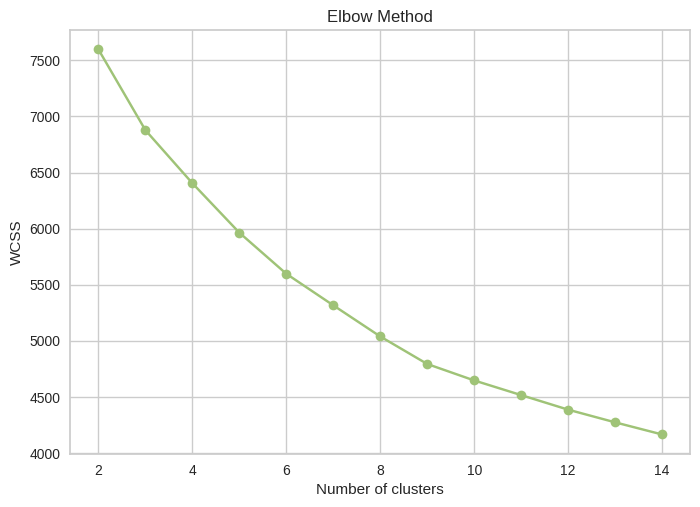

In [12]:
wcss = []  # Within-Cluster Sum of Squares

k_grid = range(2, 15)
for i in k_grid:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(k_grid, wcss, 'go-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Yellow brick lib

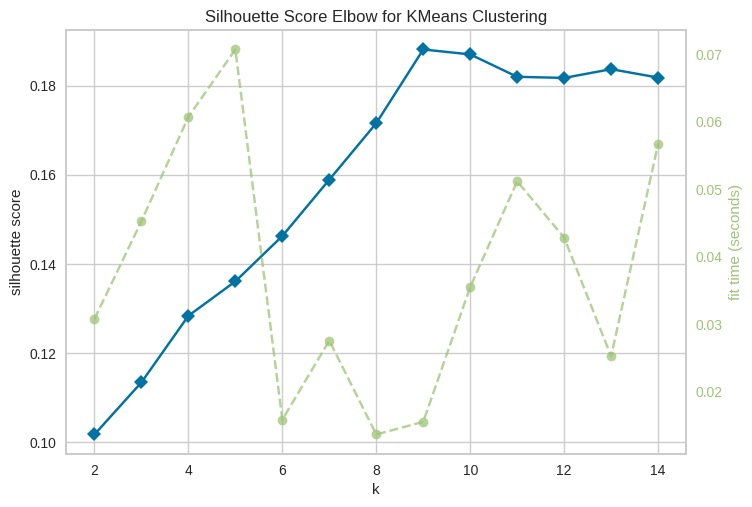

In [13]:
# Instantiate the clustering model and visualizer

# - **distortion**: mean sum of squared distances to centers
# - **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
# - **calinski_harabasz**: ratio of within to between cluster dispersion


visualizer = KElbowVisualizer(KMeans(),
                              metric='silhouette',  # possible values: calinski_harabasz, distortion, silhouette
                              distance_metric="euclidean", # options allowed by sklearn's metrics.pairwise.pairwise_distances
                              k=k_grid,
                              timings=True,
                              locate_elbow=False, # True or False
                             )

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show();       # Finalize and render the figure

## Visualize the results on PCA-reduced data


### Profiling: cluster persona

In [14]:
reduced_data = PCA(n_components=2).fit_transform(X)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

kmean_labels = kmeans.labels_

In [15]:
data["cluster"] = kmean_labels
data.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,label,cluster
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0,5
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1,8
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2,0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4,6


In [16]:
# Mapping cluster => label
contingency_table = pd.crosstab(data["cluster"], data["label"])
contingency_table

label,0,1,2,3,4,5,6,7,8,9
cluster,,,,,,,,,,
0,0,48,12,0,5,47,2,39,61,10
1,4,7,4,21,0,49,0,0,10,78
2,12,0,0,0,24,5,150,0,0,1
3,0,0,0,90,0,0,0,0,0,57
4,1,28,36,10,0,44,0,1,71,16
5,160,0,0,0,0,5,8,0,0,0
6,1,4,0,0,144,2,21,1,1,0
7,0,0,113,49,0,4,0,0,3,9
8,0,86,0,0,5,0,0,21,4,0


In [17]:
major_digit = contingency_table.idxmax(axis=1)
print(major_digit)

cluster
0    8
1    9
2    6
3    3
4    8
5    0
6    4
7    2
8    1
9    7
dtype: int64


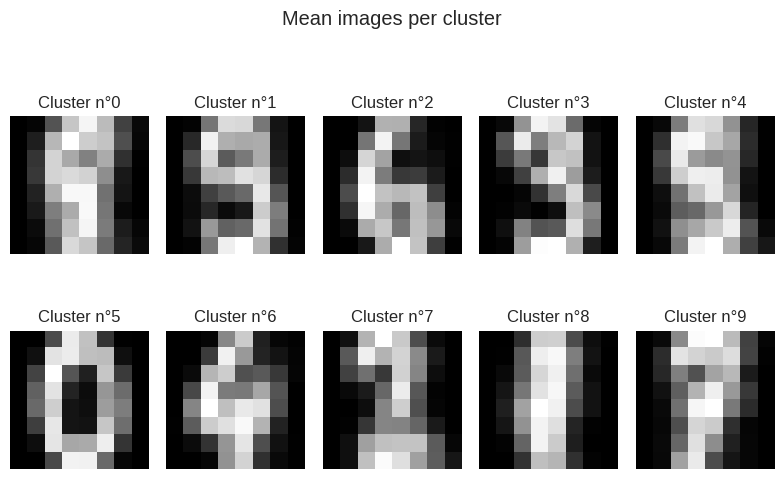

In [18]:
for cluster_id in range(n_digits):
    cluster_indices = np.where(kmean_labels == cluster_id)
    cluster_images = X[cluster_indices]
    mean_image = cluster_images.mean(axis=0).reshape(8, 8)

    plt.subplot(2, 5, cluster_id + 1)
    plt.imshow(mean_image, cmap='gray')
    plt.title(f"Cluster n°{cluster_id}")
    plt.axis('off')

plt.suptitle("Mean images per cluster")
plt.tight_layout()
plt.show()

### Visualization

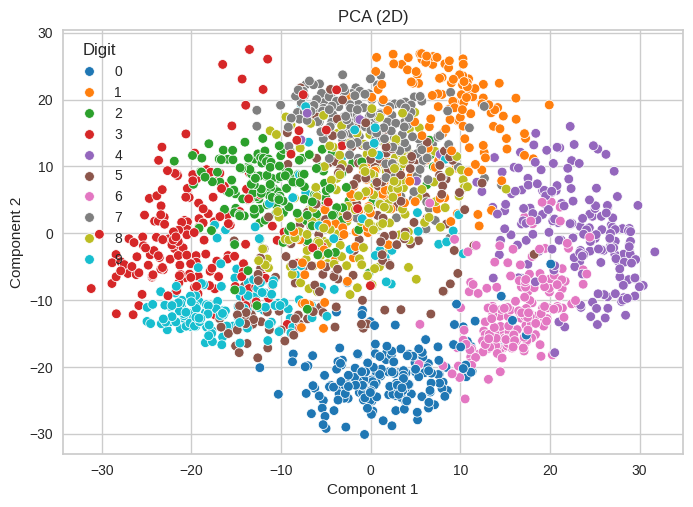

In [19]:
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=data.label, palette='tab10', legend='full')
plt.title("PCA (2D)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(title="Digit")
plt.show()


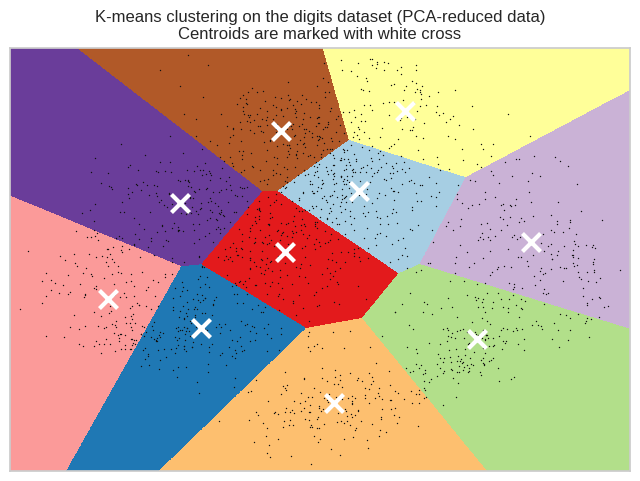

In [20]:


# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(());

## Intercluster Distance Maps

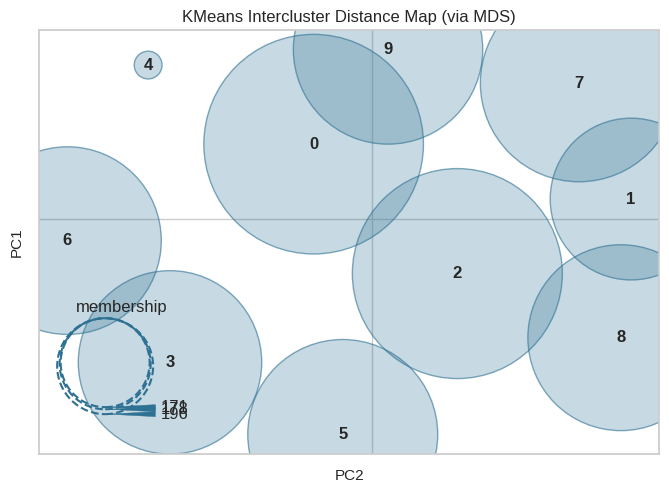

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [21]:
# Instantiate the clustering model and visualizer
model = KMeans(10)
visualizer = InterclusterDistance(model)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## Visualisation with TSNE

In [22]:
from sklearn.manifold import TSNE
# Initialize

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
df_tsne['label'] = labels # Conversion en string pour une discrétisation catégorielle

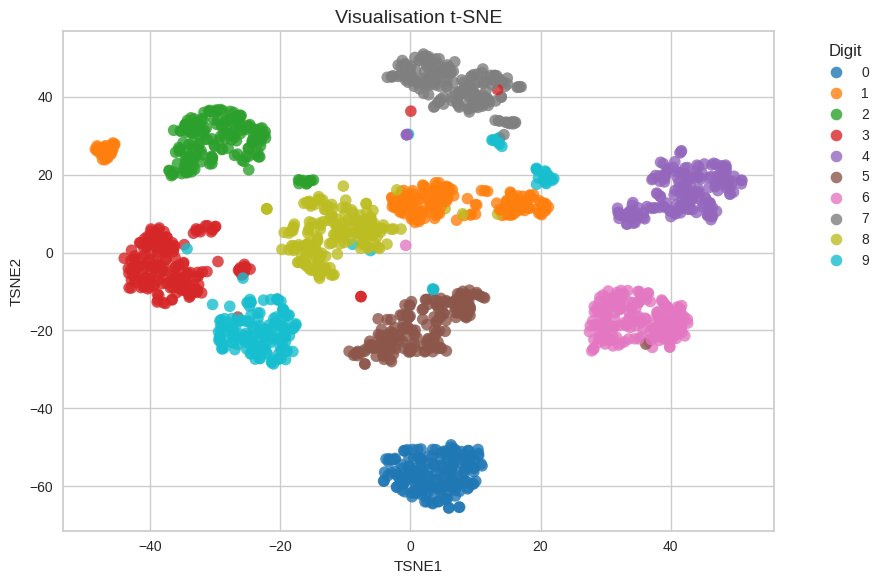

In [23]:
# Plot
plt.figure(figsize=(9, 6))
sns.scatterplot(
    data=df_tsne,
    x='TSNE1',
    y='TSNE2',
    hue='label',
    palette='tab10',
    alpha=0.8,
    s=70,
    edgecolor='none'
)
plt.title('Visualisation t-SNE', fontsize=14)
plt.legend(title='Digit', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


###TP à rendre de Clustering

- Optimiser k-means avec au moins 3 hyperparametres (nombre de clusters, etc)
- Tester l'optimisation avec ou sans réduction de dimension (Avec ou sans PCA)
- Tester avec ou sans standardisation (Minmax, Standardscaller, Robustscaller)
- Faire l'analyse des personnas pour le meilleur modèle
- Montrer la visualisation et l'analyse des clusters choisies (Avec t-sne par exemple)

Objet : TPISE-Clustering 2025

Jeudi 22/05/2025 à 18h00

## Optimisation de K-means au moins 3 hyperparamètres (nombre de clusters,etc)

Nous appliquons l’algorithme K-means sans réduction de dimension et sans standardisation, en optimisant les hyperparamètres suivants : le nombre de clusters (n_clusters), le nombre d’itérations (max_iter) et le nombre de réinitialisations de l’algorithme (n_init).

#### Optimisation du nombre de clusters

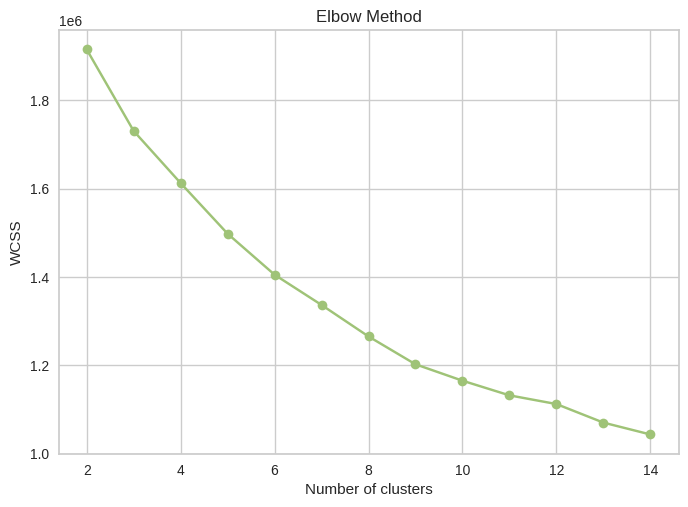

In [24]:
wcss = []  # Within-Cluster Sum of Squares

k_grid = range(2, 15)
for i in k_grid:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=8, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(k_grid, wcss, 'go-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

La méthode du coude  nous permet de choisir un nombre de clusters un nombre de clusters compris entre 8 à 12 .

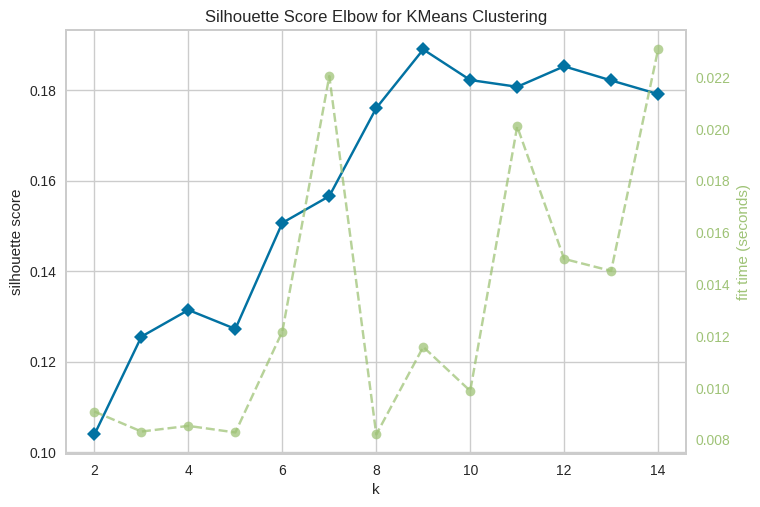

In [42]:
visualizer = KElbowVisualizer(KMeans(),
                              metric='silhouette',  # possible values: calinski_harabasz, distortion, silhouette
                              distance_metric="euclidean", # options allowed by sklearn's metrics.pairwise.pairwise_distances
                              k=k_grid,
                              timings=True,
                              locate_elbow=False, # True or False
                             )

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();

La maximisation du silhouette score semble montre un nombre de clusters optimal égal à 9.  

- Nous allons maintenant optimiser à la fois les trois paramètres : max_iter (correspondant au nombre maximal d’itérations autorisées pour qu’un seul cycle de K-means converge vers un résultat stable),n_init(nombre de fois que l’algorithme sera relancé avec des centres initiaux différents, afin de sélectionner la meilleure solution et le nombre de clusters.

- Nous considérons comme métrique de référence le silhouette Score.

In [41]:
###  Définition de la fonction d’évaluation
from time import time
from sklearn import metrics
from sklearn.cluster import KMeans

def custom_bench_kmeans(data, labels, n_clusters, n_init, max_iter):
    t0 = time()
    kmeans = KMeans(
        n_clusters=n_clusters,
        init="k-means++",
        n_init=n_init,
        max_iter=max_iter,
        random_state=0
    )
    kmeans.fit(data)
    fit_time = time() - t0

    return {
        "n_clusters": n_clusters,
        "n_init": n_init,
        "max_iter": max_iter,
        "inertia": kmeans.inertia_,
        "homogeneity": metrics.homogeneity_score(labels, kmeans.labels_),
        "completeness": metrics.completeness_score(labels, kmeans.labels_),
        "v_measure": metrics.v_measure_score(labels, kmeans.labels_),
        "ARI": metrics.adjusted_rand_score(labels, kmeans.labels_),
        "silhouette": metrics.silhouette_score(data, kmeans.labels_, sample_size=300),
        "fit_time": fit_time
    }


Nous choisissons un échantillon de 300 car il donne de meilleurs résultats.

In [45]:
###  Boucle d’optimisation des hyperparamètres
cluster_range = range(8, 13)
n_init_values = range(4, 15)
max_iter_values = [300,350,400, 500, 1000]

results = []

print(82 * "_")
print("n_clust\tn_init\titer\tinertia\thomo\tcompl\tv-meas\tARI\tsilhouette\ttime")

for n_clusters in cluster_range:
    for n_init in n_init_values:
        for max_iter in max_iter_values:
            res = custom_bench_kmeans(X, labels, n_clusters, n_init, max_iter)
            results.append(res)
            print(f"{n_clusters:7d}\t{n_init:6d}\t{max_iter:4d}\t{res['inertia']:7.0f}\t"
                  f"{res['homogeneity']:.3f}\t{res['completeness']:.3f}\t{res['v_measure']:.3f}\t"
                  f"{res['ARI']:.3f}\t{res['silhouette']:.3f}\t\t{res['fit_time']:.2f}s")

print(82 * "_")


__________________________________________________________________________________
n_clust	n_init	iter	inertia	homo	compl	v-meas	ARI	silhouette	time
      8	     4	 300	1265283	0.662	0.756	0.706	0.573	0.193		0.06s
      8	     4	 350	1265283	0.662	0.756	0.706	0.573	0.181		0.06s
      8	     4	 400	1265283	0.662	0.756	0.706	0.573	0.178		0.06s
      8	     4	 500	1265283	0.662	0.756	0.706	0.573	0.179		0.06s
      8	     4	1000	1265283	0.662	0.756	0.706	0.573	0.182		0.06s
      8	     5	 300	1265283	0.662	0.756	0.706	0.573	0.185		0.08s
      8	     5	 350	1265283	0.662	0.756	0.706	0.573	0.175		0.07s
      8	     5	 400	1265283	0.662	0.756	0.706	0.573	0.175		0.08s
      8	     5	 500	1265283	0.662	0.756	0.706	0.573	0.184		0.08s
      8	     5	1000	1265283	0.662	0.756	0.706	0.573	0.163		0.08s
      8	     6	 300	1265283	0.662	0.756	0.706	0.573	0.188		0.09s
      8	     6	 350	1265283	0.662	0.756	0.706	0.573	0.177		0.10s
      8	     6	 400	1265283	0.662	0.756	0.706	0.573	0.178		0.12s
      

In [47]:
# Trier les résultats et garder le top 3 selon ARI
top7 = sorted(results, key=lambda x: x["silhouette"], reverse=True)[:7]
df_top7_kmean = pd.DataFrame(top7)
colonnes_a_afficher = ["n_clusters", "n_init", "max_iter", "ARI", "v_measure", "homogeneity", "completeness", "silhouette", "inertia", "fit_time"]
print("\nTop 7 des configurations selon le Silhouette Score :\n")
print(df_top7_kmean[colonnes_a_afficher].round(5).to_string(index=False))



Top 7 des configurations selon le Silhouette Score :

 n_clusters  n_init  max_iter     ARI  v_measure  homogeneity  completeness  silhouette      inertia  fit_time
          9       5       350 0.59950    0.72192      0.69383       0.75238     0.20365 1.202300e+06   0.07619
          9       9       500 0.59950    0.72192      0.69383       0.75238     0.20229 1.202300e+06   0.12680
          9       5       400 0.59950    0.72192      0.69383       0.75238     0.19950 1.202300e+06   0.07055
         12       7       400 0.64974    0.75466      0.77048       0.73948     0.19880 1.112363e+06   0.12008
          9       4      1000 0.59950    0.72192      0.69383       0.75238     0.19757 1.202300e+06   0.06227
         12       8       500 0.64974    0.75466      0.77048       0.73948     0.19753 1.112363e+06   0.13315
          9      10       400 0.59950    0.72192      0.69383       0.75238     0.19738 1.202300e+06   0.14641


Les meilleurs hyperparamètres maximisant le score de Silhouette sont :

- n_init=4;
- n_clusters=9;
- max_iter=300.

Avec ces métriques, le silhouette score maximal est de 0.20 ; même après optimisation, le score est très faible.

### Optimisation des hyperparamètres avec réduction de la dimension

In [103]:
# Réduction de dimension
X_PCA = PCA(n_components=0.90).fit(X).transform(X)


In [53]:
print("Dimensions de X :", X.shape)
print("Dimensions de X_PCA :", X_PCA.shape)

Dimensions de X : (1797, 64)
Dimensions de X_PCA : (1797, 21)


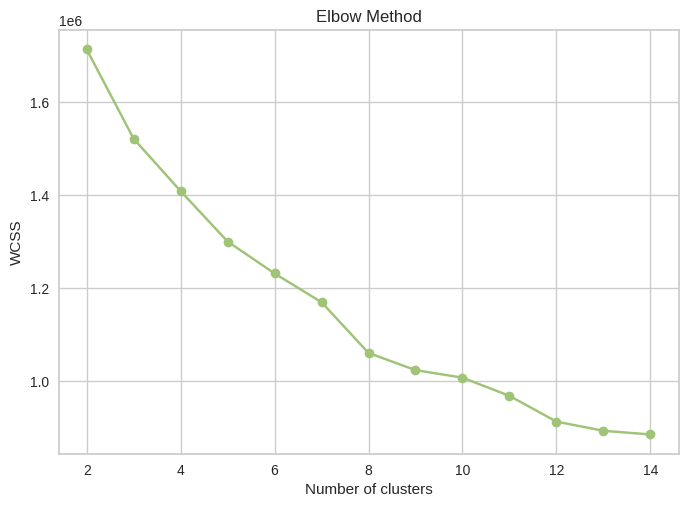

In [54]:
wcss = []  # Within-Cluster Sum of Squares

k_grid = range(2, 15)
for i in k_grid:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(X_PCA)
    wcss.append(kmeans.inertia_)

plt.plot(k_grid, wcss, 'go-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

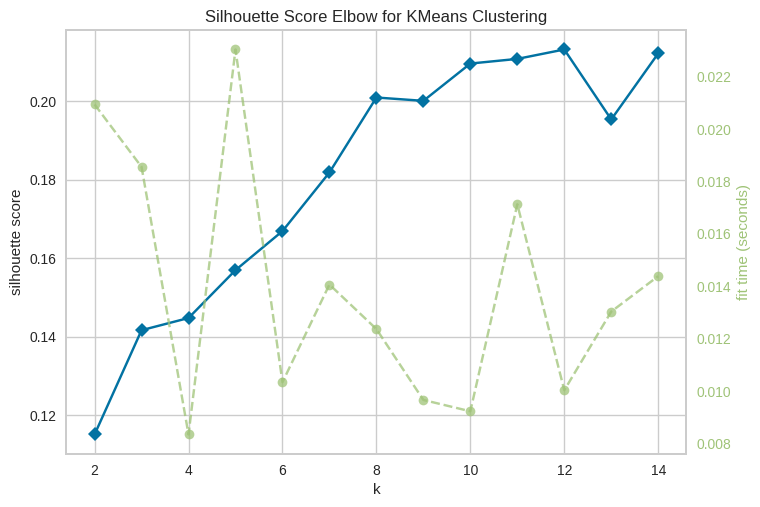

In [55]:
visualizer = KElbowVisualizer(KMeans(),
                              metric='silhouette',  # possible values: calinski_harabasz, distortion, silhouette
                              distance_metric="euclidean", # options allowed by sklearn's metrics.pairwise.pairwise_distances
                              k=k_grid,
                              timings=True,
                              locate_elbow=False, # True or False
                             )

visualizer.fit(X_PCA)        # Fit the data to the visualizer
visualizer.show();

On peut choisir un nombre de clusters entre 8 et 12 même si le graphique du coude suggère de commencer à 7. La maximisation du Silhouette Score semble se faire pour un nombre de clusters égal à 12. Nous allons optimiser les autres hyperparamètres .

In [63]:
###  Boucle d’optimisation des hyperparamètres avec PCA
cluster_range = range(8, 13)
n_init_values = range(4, 10)
max_iter_values = [300,350,400,500,1000]

results_pca = []

print(82 * "_")
print("n_clust\tn_init\titer\tinertia\thomo\tcompl\tv-meas\tARI\tsilhouette\ttime")

for n_clusters in cluster_range:
    for n_init in n_init_values:
        for max_iter in max_iter_values:
            res = custom_bench_kmeans(X_PCA, labels, n_clusters, n_init, max_iter)
            results_pca.append(res)
            print(f"{n_clusters:7d}\t{n_init:6d}\t{max_iter:4d}\t{res['inertia']:7.0f}\t"
                  f"{res['homogeneity']:.3f}\t{res['completeness']:.3f}\t{res['v_measure']:.3f}\t"
                  f"{res['ARI']:.3f}\t{res['silhouette']:.3f}\t\t{res['fit_time']:.2f}s")

print(82 * "_")

__________________________________________________________________________________
n_clust	n_init	iter	inertia	homo	compl	v-meas	ARI	silhouette	time
      8	     4	 300	1060160	0.639	0.727	0.680	0.555	0.202		0.05s
      8	     4	 350	1060160	0.639	0.727	0.680	0.555	0.208		0.05s
      8	     4	 400	1060160	0.639	0.727	0.680	0.555	0.201		0.05s
      8	     4	 500	1060160	0.639	0.727	0.680	0.555	0.200		0.06s
      8	     4	1000	1060160	0.639	0.727	0.680	0.555	0.206		0.06s
      8	     5	 300	1060160	0.639	0.727	0.680	0.555	0.191		0.06s
      8	     5	 350	1060160	0.639	0.727	0.680	0.555	0.195		0.07s
      8	     5	 400	1060160	0.639	0.727	0.680	0.555	0.202		0.08s
      8	     5	 500	1060160	0.639	0.727	0.680	0.555	0.202		0.06s
      8	     5	1000	1060160	0.639	0.727	0.680	0.555	0.202		0.07s
      8	     6	 300	1058963	0.665	0.759	0.709	0.577	0.196		0.07s
      8	     6	 350	1058963	0.665	0.759	0.709	0.577	0.201		0.07s
      8	     6	 400	1058963	0.665	0.759	0.709	0.577	0.204		0.07s
      

In [65]:
# Trier les résultats et garder le top 3 selon ARI avec la réduction de dimension
top7 = sorted(results_pca, key=lambda x: x["silhouette"], reverse=True)[:7]
df_top7_kmean_PCA = pd.DataFrame(top7)
colonnes_a_afficher = ["n_clusters", "n_init", "max_iter", "ARI", "v_measure", "homogeneity", "completeness", "silhouette", "inertia", "fit_time"]
print("\nTop 7 des configurations selon le score de Silhouette :\n")
print(df_top7_kmean_PCA[colonnes_a_afficher].round(5).to_string(index=False))



Top 7 des configurations selon le score de Silhouette :

 n_clusters  n_init  max_iter     ARI  v_measure  homogeneity  completeness  silhouette      inertia  fit_time
          9       9       500 0.59657    0.71891      0.69106       0.74911     0.23192 996702.67096   0.09885
          9       9       400 0.59657    0.71891      0.69106       0.74911     0.23183 996702.67096   0.07391
         11       9       300 0.63144    0.74381      0.74624       0.74140     0.22879 931493.19521   0.09531
         11       9       500 0.63144    0.74381      0.74624       0.74140     0.22748 931493.19521   0.11246
          9       7       500 0.59657    0.71891      0.69106       0.74911     0.22735 996702.67096   0.05580
          9       8       500 0.59657    0.71891      0.69106       0.74911     0.22640 996702.67096   0.06442
          9       4       350 0.59657    0.71891      0.69106       0.74911     0.22591 996702.67096   0.03232


Avec la réduction de dimension, nous avons les paramètres suivant après optimisation (n_clusters=9, n_init=9, max_iter=500) qui maximisent la métrique silhouette. On  constate une bonne amélioration du score (0.231) bien que cela n'indique pas une bonne performance.

### Optimisation avec standardisation des données

In [66]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_mm_scaled = scaler.fit_transform(X)


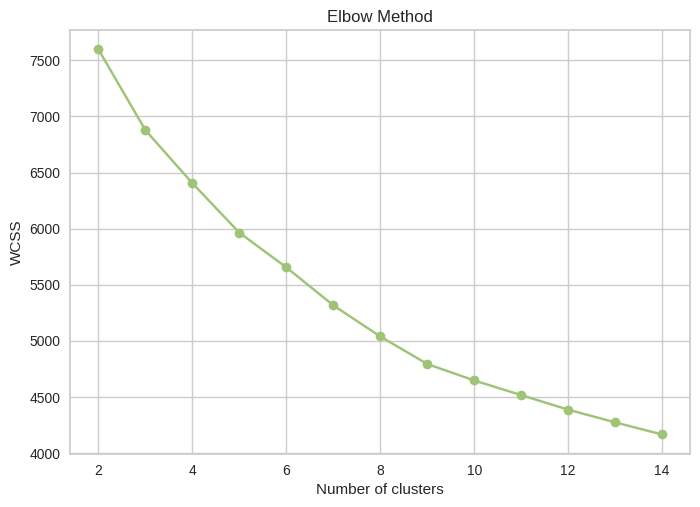

In [67]:
wcss = []  # Within-Cluster Sum of Squares

k_grid = range(2, 15)
for i in k_grid:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=8, random_state=0)
    kmeans.fit(X_mm_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(k_grid, wcss, 'go-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

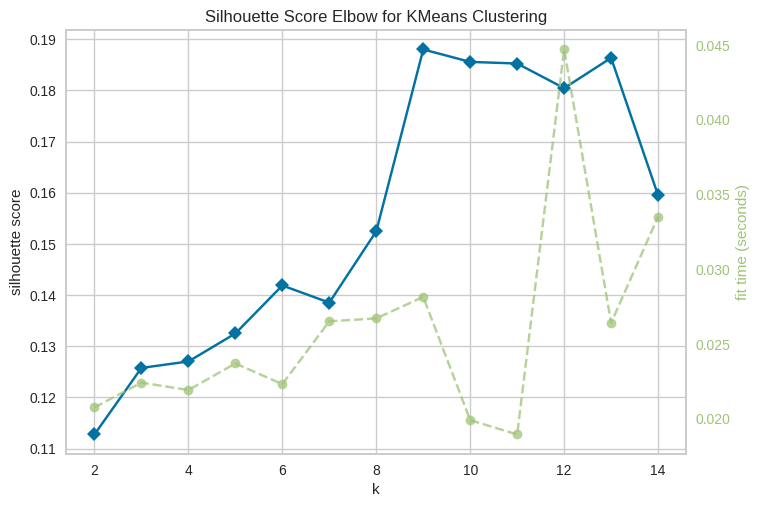

In [68]:
visualizer = KElbowVisualizer(KMeans(),
                              metric='silhouette',  # possible values: calinski_harabasz, distortion, silhouette
                              distance_metric="euclidean", # options allowed by sklearn's metrics.pairwise.pairwise_distances
                              k=k_grid,
                              timings=True,
                              locate_elbow=False, # True or False
                             )

visualizer.fit(X_mm_scaled)        # Fit the data to the visualizer
visualizer.show();

Le nombre optimal de clusters selon le silhouette Score est de 9 .

In [69]:
###  Boucle d’optimisation des hyperparamètres avec PCA
cluster_range = range(8, 12)
n_init_values = range(8,13)
max_iter_values = [250,300,350,400]

results_std = []

print(82 * "_")
print("n_clust\tn_init\titer\tinertia\thomo\tcompl\tv-meas\tARI\tsilhouette\ttime")

for n_clusters in cluster_range:
    for n_init in n_init_values:
        for max_iter in max_iter_values:
            res = custom_bench_kmeans(X_std_scaled, labels, n_clusters, n_init, max_iter)
            results_std.append(res)
            print(f"{n_clusters:7d}\t{n_init:6d}\t{max_iter:4d}\t{res['inertia']:7.0f}\t"
                  f"{res['homogeneity']:.3f}\t{res['completeness']:.3f}\t{res['v_measure']:.3f}\t"
                  f"{res['ARI']:.3f}\t{res['silhouette']:.3f}\t\t{res['fit_time']:.2f}s")

print(82 * "_")

__________________________________________________________________________________
n_clust	n_init	iter	inertia	homo	compl	v-meas	ARI	silhouette	time
      8	     8	 250	  75208	0.564	0.669	0.612	0.465	0.123		0.15s
      8	     8	 300	  75208	0.564	0.669	0.612	0.465	0.122		0.15s
      8	     8	 350	  75208	0.564	0.669	0.612	0.465	0.129		0.20s
      8	     8	 400	  75208	0.564	0.669	0.612	0.465	0.119		0.17s
      8	     9	 250	  75181	0.530	0.646	0.582	0.412	0.125		0.20s
      8	     9	 300	  75181	0.530	0.646	0.582	0.412	0.133		0.21s
      8	     9	 350	  75181	0.530	0.646	0.582	0.412	0.121		0.20s
      8	     9	 400	  75181	0.530	0.646	0.582	0.412	0.111		0.22s
      8	    10	 250	  75181	0.530	0.646	0.582	0.412	0.126		0.19s
      8	    10	 300	  75181	0.530	0.646	0.582	0.412	0.108		0.20s
      8	    10	 350	  75181	0.530	0.646	0.582	0.412	0.102		0.21s
      8	    10	 400	  75181	0.530	0.646	0.582	0.412	0.109		0.22s
      8	    11	 250	  75181	0.530	0.646	0.582	0.412	0.141		0.24s
      

In [74]:
# Trier les résultats et garder le top 3 selon ARI avec la réduction de dimension
top7 = sorted(results_std, key=lambda x: x["silhouette"], reverse=True)[:7]
df_top7_kmean_std = pd.DataFrame(top7)
colonnes_a_afficher = ["n_clusters", "n_init", "max_iter", "ARI", "v_measure", "homogeneity", "completeness", "silhouette", "inertia", "fit_time"]
print("\nTop 7 des configurations selon le score de silhouette :\n")
print(df_top7_kmean_std[colonnes_a_afficher].round(5).to_string(index=False))



Top 7 des configurations selon le score de silhouette :

 n_clusters  n_init  max_iter     ARI  v_measure  homogeneity  completeness  silhouette     inertia  fit_time
         11      10       300 0.55773    0.69189      0.68409       0.69988     0.16636 67274.43566   0.23847
         11       9       400 0.55773    0.69189      0.68409       0.69988     0.16363 67274.43566   0.14816
         11      12       400 0.55773    0.69189      0.68409       0.69988     0.16235 67274.43566   0.32158
         11      11       400 0.55773    0.69189      0.68409       0.69988     0.16142 67274.43566   0.30805
         11       8       400 0.55773    0.69189      0.68409       0.69988     0.16075 67274.43566   0.13450
         10       9       400 0.46793    0.62636      0.60310       0.65149     0.15967 69405.49806   0.21794
         10      12       400 0.46793    0.62636      0.60310       0.65149     0.15513 69405.49806   0.18330


Pour n_clusters=11, n_init=10, max_iter=300, on obtient un silhouette score maximal de 0.166, ce qui est faible par rapport aux autres algorithmes.

### Comparaison des résultats

In [75]:
import pandas as pd

# --- Top 1 pour KMeans classique ---
top1_kmean = sorted(results, key=lambda x: x["silhouette"], reverse=True)[0]
df_top1_kmean = pd.DataFrame([top1_kmean])
df_top1_kmean["Méthode"] = "KMeans"

# --- Top 1 pour KMeans + PCA ---
top1_kmean_pca = sorted(results_pca, key=lambda x: x["silhouette"], reverse=True)[0]
df_top1_kmean_pca = pd.DataFrame([top1_kmean_pca])
df_top1_kmean_pca["Méthode"] = "KMeans + PCA"

# --- Top 1 pour KMeans + MinMaxScaler ---
top1_kmean_std = sorted(results_std, key=lambda x: x["silhouette"], reverse=True)[0]
df_top1_kmean_std = pd.DataFrame([top1_kmean_std])
df_top1_kmean_std["Méthode"] = "KMeans + MinMax"

# --- Fusionner les trois top 1 ---
df_comparatif = pd.concat([df_top1_kmean, df_top1_kmean_pca, df_top1_kmean_std], ignore_index=True)

# --- Colonnes à afficher ---
colonnes_a_afficher = [
    "Méthode", "n_clusters", "n_init", "max_iter",
    "ARI", "v_measure", "homogeneity", "completeness",
    "silhouette", "inertia", "fit_time"
]

# --- Affichage final ---
print("\nComparaison des meilleurs modèles KMeans :\n")
print(df_comparatif[colonnes_a_afficher].round(5).to_string(index=False))



Comparaison des meilleurs modèles KMeans :

        Méthode  n_clusters  n_init  max_iter     ARI  v_measure  homogeneity  completeness  silhouette      inertia  fit_time
         KMeans           9       5       350 0.59950    0.72192      0.69383       0.75238     0.20365 1.202300e+06   0.07619
   KMeans + PCA           9       9       500 0.59657    0.71891      0.69106       0.74911     0.23192 9.967027e+05   0.09885
KMeans + MinMax          11      10       300 0.55773    0.69189      0.68409       0.69988     0.16636 6.727444e+04   0.23847


Il apparait qu'en optimisant KMeans en appliquant la réduction de dimension, on arrive à de bons résultats en terme de Métrique silhouette qu'en optimisant l'algorithme seule ou avec la standardisation MinMaxScaler. Notre choix se porte alors sur l'algorithme K-means avec réduction de dimension. Pour cet algorithme, le nombre de clusters est égal à 9, n_init= 9, max_iter=350. Le score est de 0.23 et reste quand même faible.

### Analyse des personas pour le meilleur modèle

In [85]:
# Réentraînement du modèle avec les meilleurs paramètres retenus
best_n_clusters = 9
best_n_init = 9
best_max_iter = 350


best_model = KMeans(
    n_clusters=int(best_n_clusters),
    n_init=int(best_n_init),
    max_iter=int(best_max_iter),
    random_state=0
)
best_model.fit(X_PCA)
cluster_labels = best_model.labels_


In [86]:
data["cluster"] = cluster_labels


In [87]:
# Mapping cluster => label
contingency_table = pd.crosstab(data["cluster"], data["label"])
contingency_table

label,0,1,2,3,4,5,6,7,8,9
cluster,,,,,,,,,,
0,0,0,12,163,0,40,0,0,46,145
1,0,99,8,7,2,0,2,2,101,1
2,1,0,0,0,165,2,0,0,0,0
3,177,0,1,0,0,0,1,0,1,0
4,0,55,2,0,3,0,1,2,9,20
5,0,3,0,0,0,2,177,0,2,0
6,0,1,0,2,0,138,0,0,4,6
7,0,0,3,9,11,0,0,175,7,8
8,0,24,151,2,0,0,0,0,4,0


Les clusters obtenus mélangent plusieurs vrais labels différents en général.Par exemple le cluster 0 ne contient pas les images de chiffres 0 mais plutôt beaucoup d'images de 9 et 3. A l'inverse le cluster 3 contient enormément de vrais 0

In [88]:
major_digit = contingency_table.idxmax(axis=1)
print(major_digit)

cluster
0    3
1    8
2    4
3    0
4    1
5    6
6    5
7    7
8    2
dtype: int64


On constate qu'il n y a pas de correspondance avec les vrais labels ; Seul le chiffre 7 est bien reconnu.

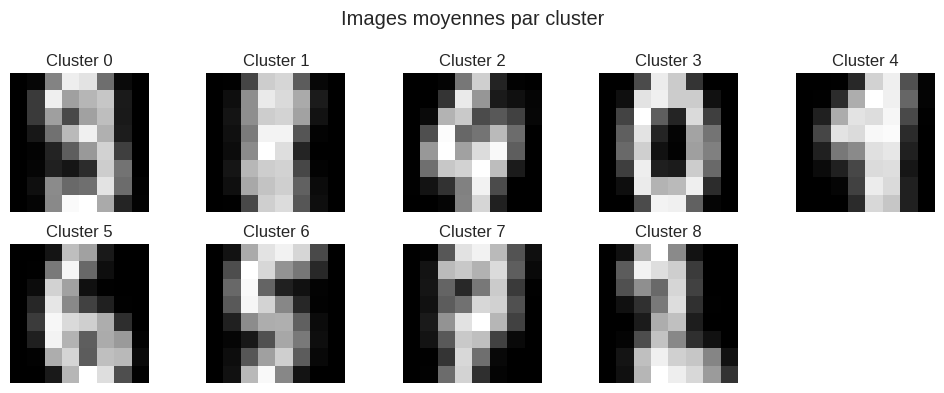

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import math

n_clusters = data['cluster'].nunique()
n_cols = 5
n_rows = math.ceil(n_clusters / n_cols)

plt.figure(figsize=(n_cols * 2, n_rows * 2))

for idx, cluster_id in enumerate(sorted(data['cluster'].unique())):
    cluster_images = X[data['cluster'] == cluster_id]
    mean_image = cluster_images.mean(axis=0).reshape(8, 8)  # ou (28,28) selon ton jeu

    plt.subplot(n_rows, n_cols, idx + 1)
    plt.imshow(mean_image, cmap='gray')
    plt.title(f"Cluster {cluster_id}")
    plt.axis('off')

plt.suptitle("Images moyennes par cluster")
plt.tight_layout()
plt.show()


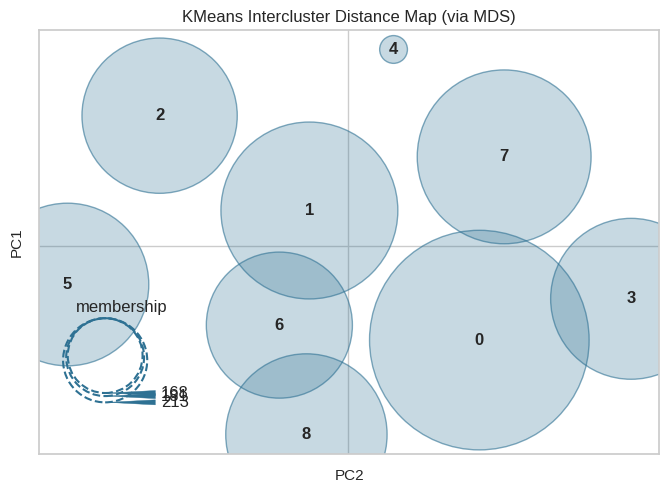

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [92]:
# Instantiate the clustering model and visualizer
model = best_model
visualizer = InterclusterDistance(model)

visualizer.fit(X_PCA)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

La séparation des clusters n'est pas très bonne.

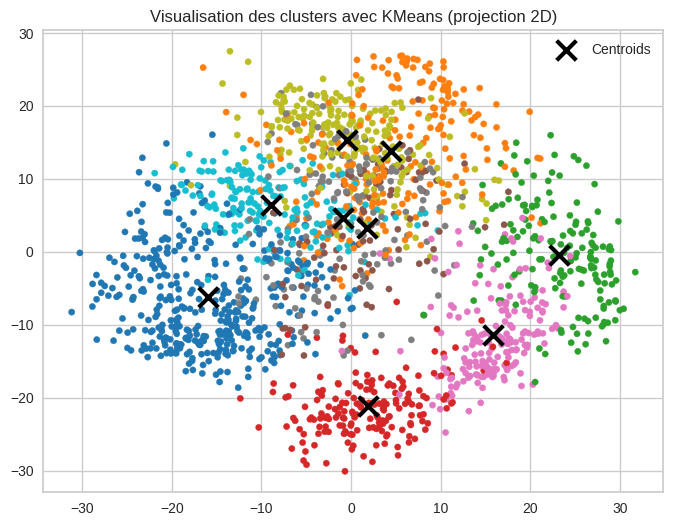

In [111]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. PCA à 2 dimensions uniquement pour affichage
pca_visu = PCA(n_components=2)
X_2D = pca_visu.fit_transform(X_PCA)

# 2. Projeter les centroïdes dans l’espace 2D
centroids_2D = pca_visu.transform(best_model.cluster_centers_)

# 3. Tracer les clusters et les centroïdes
plt.figure(figsize=(8, 6))
plt.scatter(X_2D[:, 0], X_2D[:, 1], c=cluster_labels, cmap='tab10', s=20)
plt.scatter(centroids_2D[:, 0], centroids_2D[:, 1],
            marker='x', s=200, linewidths=3, color='black', label='Centroids')

plt.title("Visualisation des clusters avec KMeans (projection 2D)")
plt.legend()
plt.show()


En général, Les clusters apparaissent mal  séparés dans l’espace 2D, on peut comprendre que la segmentation réalisée par KMeans n'est pertinente. Egalement certains centroides sont très proches

## Visualisation with TSNE

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


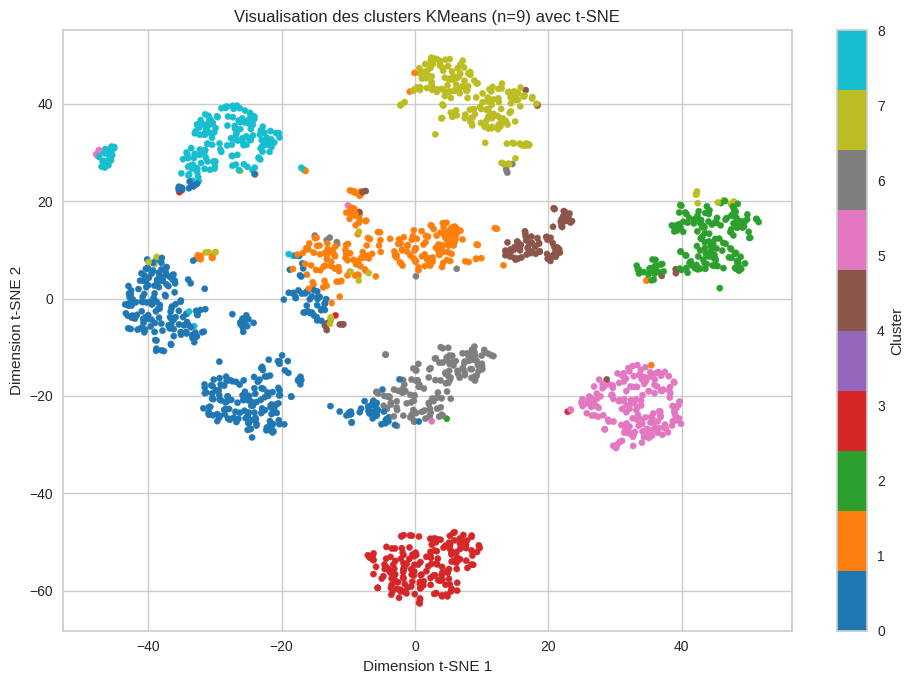

In [112]:
tsne = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_PCA)

# Affichage avec couleurs selon le cluster
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data['cluster'], cmap='tab10', s=20)

plt.title("Visualisation des clusters KMeans (n=9) avec t-SNE")
plt.xlabel("Dimension t-SNE 1")
plt.ylabel("Dimension t-SNE 2")
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.show()


Certains  clusters comme celui  correspondant aux zeros sont dispersés et se mélangent avec d'autres.

**Conclusion :** L’algorithme K-means ne semble pas converger correctement, même après transformation des données, comme en témoigne un score de silhouette faible de 0.231. Cela peut s’expliquer par le fait que K-means repose sur des distances euclidiennes, ce qui limite sa capacité à détecter des structures non linéaires. Il serait donc pertinent d’envisager l’utilisation d’un algorithme plus adapté, comme DBSCAN, capable de mieux gérer des formes de clusters complexes et la présence de bruit.